## Mini Project 3

Designing a single-stage differential amplifier circuit comprising of a PMOS diff-pair, a low voltage cascode current mirror, and two pairs of NMOS transistors in a folded cascode arrangement

### Schematic Capture and Simulation

#### Voltage Transfer Characteristics


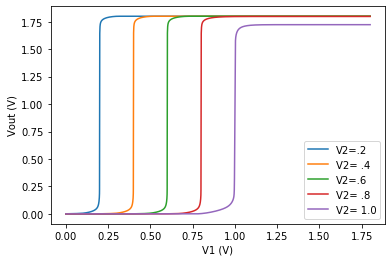

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vout = pd.read_csv("data/diff_2a.txt", sep=" +", engine='python')

#plot VTC curvers
vout.plot("vsweep", ["v1", "v2", "v3", "v4", "v5"])
plt.xlabel("V1 (V)")
plt.ylabel("Vout (V)")
plt.legend(["V2=.2", "V2= .4", "V2=.6", "V2= .8", "V2= 1.0"])
plt.show()

gain v1:  1525.112863216837
gain v2:  1514.499295978832
gain v3:  1501.1661565035463
gain v4:  1445.425747167059
gain v5:  205.8942774543439


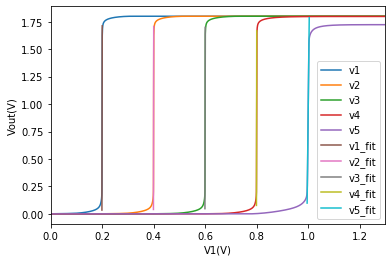

In [56]:
# Calculating DC gain for VTC curves
for i in range(1,6):
    x = vout["vsweep"].loc[(vout["v" + str(i)] > .2) & (vout["v" + str(i)] < 1.6)]
    y = vout["v" + str(i)].loc[(vout["v" + str(i)] > .2) & (vout["v" + str(i)] < 1.6)]
    v_fit = np.polyfit(x,y, 1)
    vout["v" + str(i) + "_fit"] = x * v_fit[0] + v_fit[1]
    print("gain v" + str(i) +": ", v_fit[0])

#plot
vout.plot("vsweep", ["v1", "v2", "v3", "v4", "v5", "v1_fit", "v2_fit", "v3_fit", "v4_fit", "v5_fit"], xlim=(0,1.3))
plt.xlabel("V1(V)")
plt.ylabel("Vout(V)")
plt.show()

# gain v5 is an outlier because v_out when v2=1V limits at a value lower than 1.8

#### Voltage to Current Transfer Characteristics

transconductance (g):  1.1754080716098113e-05
initial current:  -1.30456836e-06
final current:  1.30525259e-06


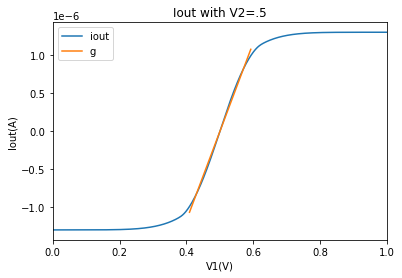

In [89]:
#read csv
vout = pd.read_csv("data/diff_2b.txt", sep=" +", engine="python")

#calculate transconductance
x = vout["v1"].loc[(vout["iout"] > -1e-6) & (vout["iout"] < 1e-6)]
y = vout["iout"].loc[(vout["iout"] > -1e-6) & (vout["iout"] < 1e-6)]
g_fit = np.polyfit(x,y, 1)
vout["g"] = x * g_fit[0] + g_fit[1]
print("transconductance (g): ", g_fit[0])

#print initial, final current
print("initial current: ", vout["iout"].iloc[0])
print("final current: ", vout["iout"].iloc[-1])

#plot
vout.plot("v1", ["iout", "g"],  xlim=(0,1))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("V1(V)")
plt.ylabel("Iout(A)")
plt.title("Iout with V2=.5")
plt.show()

The limiting values of the output current are slightly less than my ib current of 1.5e-6 with values of +- 1.3e-6

#### Loopgain

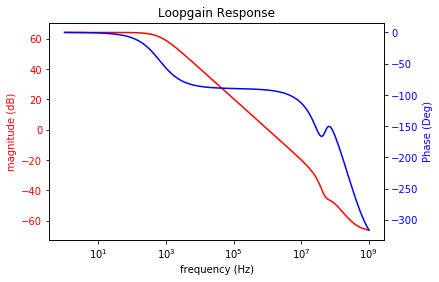

In [230]:
#read csv
vout = pd.read_csv("data/diff_2c.txt", sep=" +", engine="python")

#plot mag and phase
fig, ax1 = plt.subplots()

ax1.set_ylabel("magnitude (dB)", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_xlabel("frequency (Hz)")
ax1.set_xscale("log")
ax1.plot(vout.freq, vout.mag, color="red")

ax2 = ax1.twinx()
ax2.set_ylabel("Phase (Deg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.plot(vout.freq, vout.phase, color="blue")

plt.title("Loopgain Response")
plt.show()

In [227]:
#print dc gain

print("gain at 1Hz: ", vout["real"].iloc[0])
# print(np.power(10, vout.mag[0]/20))

#Calculate Unity Gain Crossover Freq

#From Graph
min_mag = abs(vout["mag"]).min()
min_freq = vout["freq"].loc[vout["mag"] == min_mag]
print("crossover freq graph: ", min_freq.iloc[0])

#From Transconductance
c = 2e-12
tau = c / g_fit[0]
print("tau: ", tau)
crossover_freq = 1/tau/(2*np.pi)
print("crossover freq g,c: ", crossover_freq)

gain at 1Hz:  1611.04698
crossover freq graph:  1000000.0
tau:  1.7015367243997626e-07
crossover freq g,c:  935360.0237340698


#### Unity-Gain Follower Frequency Response

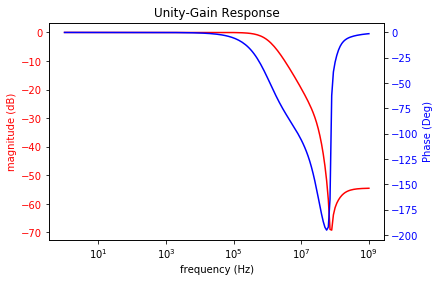

In [181]:
#read csv
vout = pd.read_csv("data/diff_2d.txt", sep=" +", engine="python")

#plot mag and phase
fig, ax1 = plt.subplots()

ax1.set_ylabel("magnitude (dB)", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_xlabel("frequency (Hz)")
ax1.set_xscale("log")
ax1.plot(vout.freq, vout.mag, color="red")

ax2 = ax1.twinx()
ax2.set_ylabel("Phase (Deg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.plot(vout.freq, vout.phase, color="blue")

plt.title("Unity-Gain Response")
plt.show()

The corner frequency appears to be around $10^6$ which is expected from our previous calculations.

#### Small-Signal Step Response

In [252]:
#read csv
vout = pd.read_csv("data/diff_2e.txt", sep=" +", engine="python")
# print(vout.tail())

#calculate time constant
vstart1 = vout["vout1"].iloc[0]
vfinal1 = vout["vout1"].iloc[-1]
vout["tau_dist1"] = abs(vout["vout1"]-(vfinal1 - (vfinal1-vstart1)/np.e))
tau1 = vout["time"].loc[vout["tau_dist1"] == vout["tau_dist1"].min()]
tau1 = tau1.iloc[0] - 1.01e-8 #start of step response
print("tau 1: ", tau1)
vstart2 = vout["vout2"].iloc[0]
vfinal2 = vout["vout2"].iloc[-1]
vout["tau_dist2"] = abs(vout["vout2"]-(vfinal2 - (vfinal2-vstart2)/np.e))
tau2 = vout["time"].loc[vout["tau_dist2"] == vout["tau_dist2"].min()]
tau2 = tau2.iloc[0] - 1.01e-8 #start of step response
print("tau 2: ", tau2)

#plot
vout.plot("time", ["vin1","vin2","vout1","vout2"], xlim(0, .6e-6))
plt.plot([tau1, tau1], [.499, .5011])
plt.plot([tau2, tau2], [.499, .5011])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(["v+", "v-", "v+ response", "v- response", "tau+", "tau-"])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Small Step Response")
plt.show()

tau 1:  1.6178e-07
tau 2:  1.6178e-07


NameError: name 'xlim' is not defined

#### Large-Amplitude Step Response

tau 1:  1.0393949300000002e-06
tau 2:  9.19394932e-07


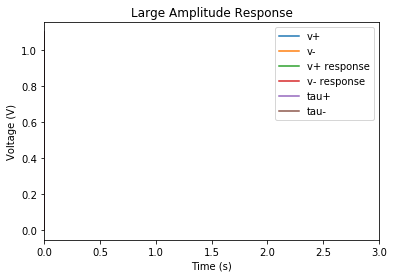

In [246]:
#read csv
vout = pd.read_csv("data/diff_2f.txt", sep=" +", engine="python")
# print(vout.tail())

#calculate time constant
vstart1 = vout["vout1"].iloc[0]
vfinal1 = vout["vout1"].iloc[-1]
vout["tau_dist1"] = abs(vout["vout1"]-(vfinal1 - (vfinal1-vstart1)/np.e))
tau1 = vout["time"].loc[vout["tau_dist1"] == vout["tau_dist1"].min()]
tau1 = tau1.iloc[0] - 1.01e-8 #start of step response
print("tau 1: ", tau1)
vstart2 = vout["vout2"].iloc[0]
vfinal2 = vout["vout2"].iloc[-1]
vout["tau_dist2"] = abs(vout["vout2"]-(vfinal2 - (vfinal2-vstart2)/np.e))
tau2 = vout["time"].loc[vout["tau_dist2"] == vout["tau_dist2"].min()]
tau2 = tau2.iloc[0] - 1.01e-8 #start of step response
print("tau 2: ", tau2)

#plot
vout.plot("time", ["vin1","vin2","vout1","vout2"], xlim=(0,3e-6))
plt.plot([tau1, tau1], [0, 1.1])
plt.plot([tau2, tau2], [0, 1.1])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(["v+", "v-", "v+ response", "v- response", "tau+", "tau-"])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Large Amplitude Response")
plt.show()

slew for v+:  315140.050033791
slew for v-:  -307361.8259687863
theoretical slew rate:  650000.0


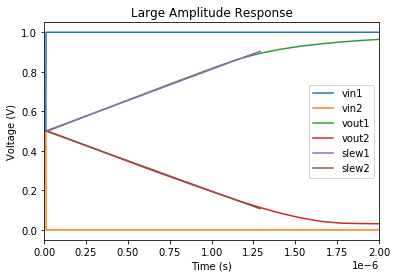

In [250]:
#slew rate from graph
x = vout["time"].loc[(vout["vout1"] > .5) & (vout["vout1"] < .9)]
y = vout["vout1"].loc[(vout["vout1"] > .5) & (vout["vout1"] < .9)]
slew = np.polyfit(x,y, 1)
vout["slew1"] = x * slew[0] + slew[1]
print("slew for v+: ", slew[0])

x = vout["time"].loc[(vout["vout2"] < .5) & (vout["vout2"] > .1)]
y = vout["vout2"].loc[(vout["vout2"] < .5) & (vout["vout2"] > .1)]
slew = np.polyfit(x,y, 1)
vout["slew2"] = x * slew[0] + slew[1]
print("slew for v-: ", slew[0])

#theoretical slew rate 
c = 2e-12
ib = 1.3e-6
print("theoretical slew rate: ", ib/c)

vout.plot("time", ["vin1","vin2","vout1","vout2", "slew1", "slew2"], xlim=(0,2e-6))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Large Amplitude Response")
plt.show()